### Knock airport Weather

This notebook contains the assignment 6 (assignment_6_Weather) of the Lecture 6 of the module Programming for Data Analytics. 

Author: Jennifer Ibanez Cano

In this notebook I'll analyze the data related with the Knock Airport weather. 

Using this [dataset](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv).

The first part of the assignment consist to plot:
- The temperature.
- The mean temperature each day.
- The mean temperature for each month. 

The second part of the assigment consist to plot:
- The Windspeed.
- The rolling windspeed (over 24 hours).
- The max windspeed for each day.
- The monthly mean of the daily max windspeeds.

In [2]:
# First I'll need to import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime 
import seaborn as sns

In [3]:
# Get the data. 

df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=22, low_memory=False) 
#See the first 5 rows of the dataset
df[:5]

# Skiprows=22 I used to skip the first 22 rows of the dataset.
# Adding the low_memory=False argument to the read_csv function to avoid the warning message.

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


The dataset consist of 247674 readings of 21 different values related with the weather in the Knock Airport. 

Station Name: KNOCK AIRPORT
Station Height: 201 M 
Latitude:53.906  ,Longitude: -8.817


date:  -  Date and Time (utc)
rain:  -  Precipitation Amount (mm)	  
temp:  -  Air Temperature (C)	
wetb:  -  Wet Bulb Temperature (C)
dewpt: -  Dew Point Temperature (C)             
rhum:  -  Relative Humidity (%)
vappr: -  Vapour Pressure (hPa)	 
msl:   -  Mean Sea Level Pressure (hPa)
wdsp:  -  Mean Wind Speed (knot)
wddir: -  Predominant Wind Direction (degree)
ww:    -  Synop code for Present Weather
w:     -  Synop code for Past Weather
sun:   -  Sunshine duration (hours)
vis:   -  Visibility (m)
clht:  -  Cloud height (100's of ft) - 999 if none 
clamt: -  Cloud amount
ind:   -  Indicator, there are five of them

In [4]:
# Check the list of the columns in the dataset.

list(df.columns)

['date',
 'ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

In [5]:
# Check the length of the dataset

len(df)

247674

In [6]:
# Applying dropna() to remove possible NaN values, 

df = df.dropna()


In [7]:
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [8]:
# Getting the data related to the temperature and the date, 
# that it's the one that I'll use for the first part of the assignment.

df[['date', 'temp']][:5]


,date,temp
0,10-apr-1996 14:00,11.5
1,31-jul-1996 08:00,11.5
2,31-jul-1996 09:00,11.6
3,31-jul-1996 10:00,12.9
4,31-jul-1996 11:00,14.5


In [9]:
df[['date','temp']].describe()

,temp
count,247674.00000
mean,8.76682
std,4.60478
min,-6.90000
25%,5.40000
50%,8.80000
75%,12.00000
max,28.50000


In [10]:
# create new columns for day, month and year.

df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

df[:5]

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,day,month,year
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,10,4,1996
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,31,7,1996
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,31,7,1996
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,25,82,0.0,28000,35,6,31,7,1996
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,2,11,0.0,40000,40,6,31,7,1996


In [11]:
df[['date','temp','day','month','year']][:5]


,date,temp,day,month,year
0,10-apr-1996 14:00,11.5,10,4,1996
1,31-jul-1996 08:00,11.5,31,7,1996
2,31-jul-1996 09:00,11.6,31,7,1996
3,31-jul-1996 10:00,12.9,31,7,1996
4,31-jul-1996 11:00,14.5,31,7,1996


#### Part 1 of the assignment.  

##### Plot the Temperature.

In [12]:

# Checking what the warning is about
df['date2'] = pd.to_datetime(df['date'])
df[['date','date2']][:5]
# We can ignore it, as the resulting date column is in the correct format.

/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_14780/772270939.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date2'] = pd.to_datetime(df['date'])


,date,date2
0,10-apr-1996 14:00,1996-04-10 14:00:00
1,31-jul-1996 08:00,1996-07-31 08:00:00
2,31-jul-1996 09:00,1996-07-31 09:00:00
3,31-jul-1996 10:00,1996-07-31 10:00:00
4,31-jul-1996 11:00,1996-07-31 11:00:00


In [13]:
# Drop the date2 column that I created to check the warning message.
df = df.drop('date2', axis=1)


/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_14780/1253054506.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


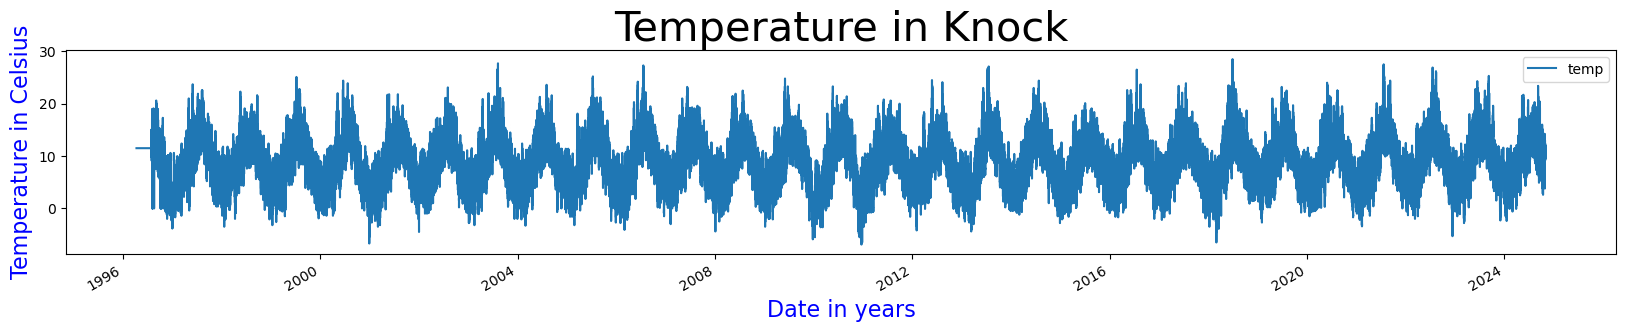

In [14]:
# Create a plot with the temperature of the whole dataset.

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
# This gives a warning, but it can be ignored, as the resulting format is the valid one

# Plot the temperature and date.
df[['date', 'temp']].plot(x='date', y='temp', kind='line', figsize=(20, 3))

plt.title("Temperature in Knock", fontsize=30, color='black') 
plt.xlabel("Date in years", fontsize=16, color='blue')
plt.ylabel("Temperature in Celsius", fontsize=16, color='blue')
plt.show()

##### Plot the mean temperature each day. 

In [15]:
# Get together the year, month and day columns into a single column.

df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df[['date', 'temp', 'day', 'month', 'year']][:30]

,date,temp,day,month,year
0,1996-04-10,11.5,10,4,1996
1,1996-07-31,11.5,31,7,1996
2,1996-07-31,11.6,31,7,1996
3,1996-07-31,12.9,31,7,1996
4,1996-07-31,14.5,31,7,1996
5,1996-07-31,14.4,31,7,1996
6,1996-07-31,14.9,31,7,1996
7,1996-07-31,13.9,31,7,1996
8,1996-07-31,13.2,31,7,1996
9,1996-07-31,15.1,31,7,1996


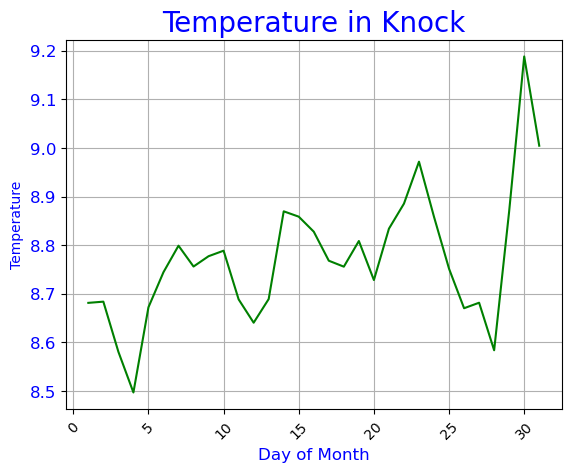

In [16]:
# Get the mean temperature for each day of the month. 
# First I need to create the columns for the daily, monthly and yearly temperature.
# Then I'll calculate the mean temperature for each day of the month.

df['daily'] = pd.to_datetime(df['date'], errors='coerce').dt.day
df['monthly'] = pd.to_datetime(df['date'], errors='coerce').dt.month    
df['yearly'] = pd.to_datetime(df['date'], errors='coerce').dt.year

df['daily_temp'] = df.groupby(['daily', 'monthly', 'yearly'])['temp'].transform('mean')
df['daily_temp']

mean_temp = df.groupby('daily')['daily_temp'].mean()

# Plotting the data
fig, ax = plt.subplots()
ax.plot(mean_temp.index, mean_temp, color='green')
ax.set(xlabel="Day of Month", ylabel="Temperature", title="Temperature in Knock")
ax.title.set_color('blue')
ax.title.set_fontsize(20)
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
plt.xlabel("Day of Month", fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.yticks(fontsize=12, color='blue')
ax.grid()
plt.show()


In [17]:
df[['date', 'temp', 'day', 'month', 'year', 'daily_temp']][:10]

,date,temp,day,month,year,daily_temp
0,1996-04-10,11.5,10,4,1996,11.50
1,1996-07-31,11.5,31,7,1996,12.65
2,1996-07-31,11.6,31,7,1996,12.65
3,1996-07-31,12.9,31,7,1996,12.65
4,1996-07-31,14.5,31,7,1996,12.65
5,1996-07-31,14.4,31,7,1996,12.65
6,1996-07-31,14.9,31,7,1996,12.65
7,1996-07-31,13.9,31,7,1996,12.65
8,1996-07-31,13.2,31,7,1996,12.65
9,1996-07-31,15.1,31,7,1996,12.65


##### Plot the mean temperature for each month. 

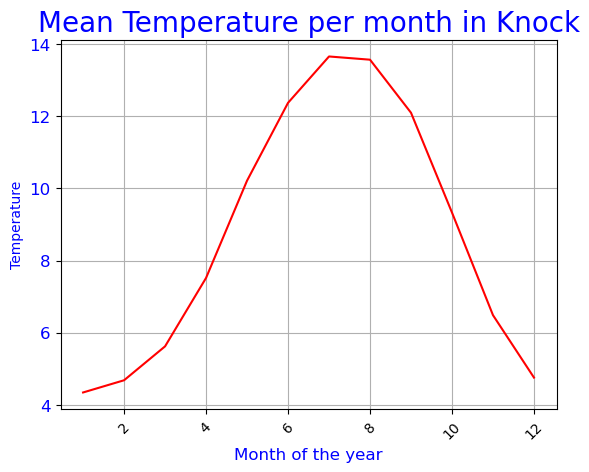

In [18]:
# Convert 'date' column to datetime

df['date'] = pd.to_datetime(df['date'])  

median_temp = df['date'].map(lambda x: x.month)

temper = df.groupby(median_temp)['temp'].mean()

total = pd.DataFrame({'month': temper.index, 'Mean_Temperature': temper.values})

# Plotting the data
fig, ax = plt.subplots()
ax.plot(temper.index, temper.values, color='red')
ax.set(xlabel="Month", ylabel="Temperature", title="Mean Temperature per month in Knock")
ax.title.set_color('blue')
ax.title.set_fontsize(20)
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
plt.xlabel("Month of the year", fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.yticks(fontsize=12, color='blue')
ax.grid()
plt.show()

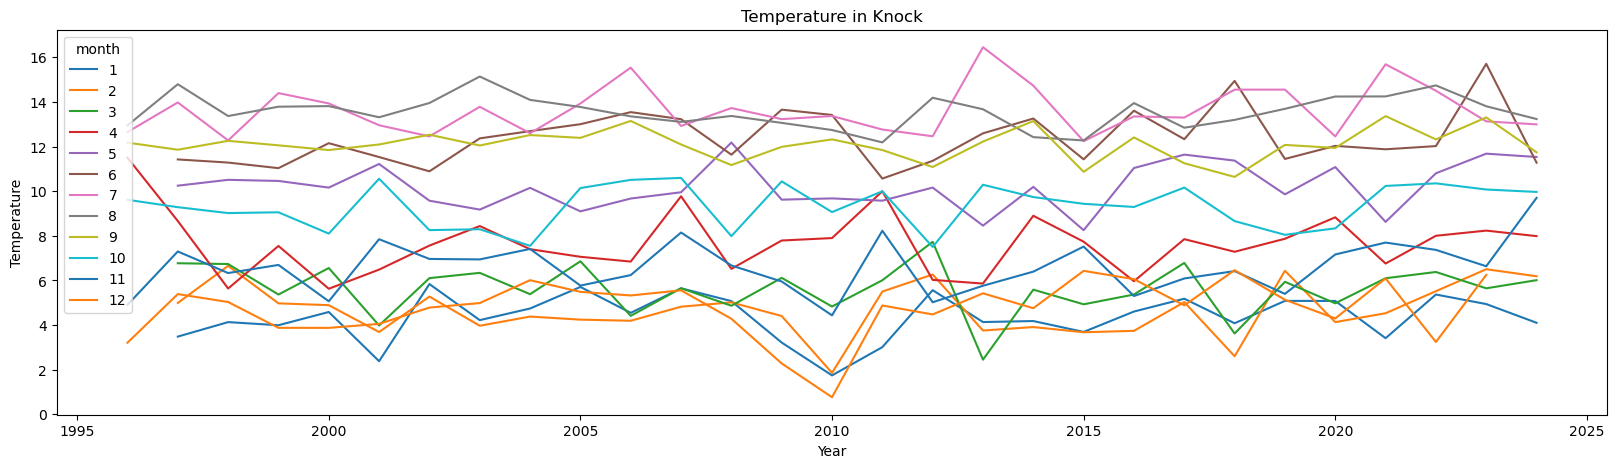

In [19]:
# create subplots with the mean temperature of the month in each year.

fig, ax = plt.subplots(figsize=(20, 5))
df.groupby(['year', 'month'])['temp'].mean().unstack().plot(ax=ax)
ax.set(title="Temperature in Knock", xlabel="Year", ylabel="Temperature")
plt.show()


#### Part two of the assignment.  

Create different plots with the following data: 

    - The windspeed 
    - The rolling windspeed over 24 hours. 
    - The max windspeed for each day. 
    - The monthly mean of the daily max windspeeds. 

##### Plot the Windspeed.

In [20]:
# First I'll check the data related with the wind speed by date.

df[['date', 'wdsp']]


,date,wdsp
0,1996-04-10,0
1,1996-07-31,0
2,1996-07-31,0
3,1996-07-31,0
4,1996-07-31,0
...,...,...
247669,2024-10-31,5
247670,2024-10-31,5
247671,2024-10-31,4
247672,2024-10-31,6


In [21]:
# Ensure 'wdsp' column is numeric and handle NaN values
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df = df.dropna(subset=['wdsp'])


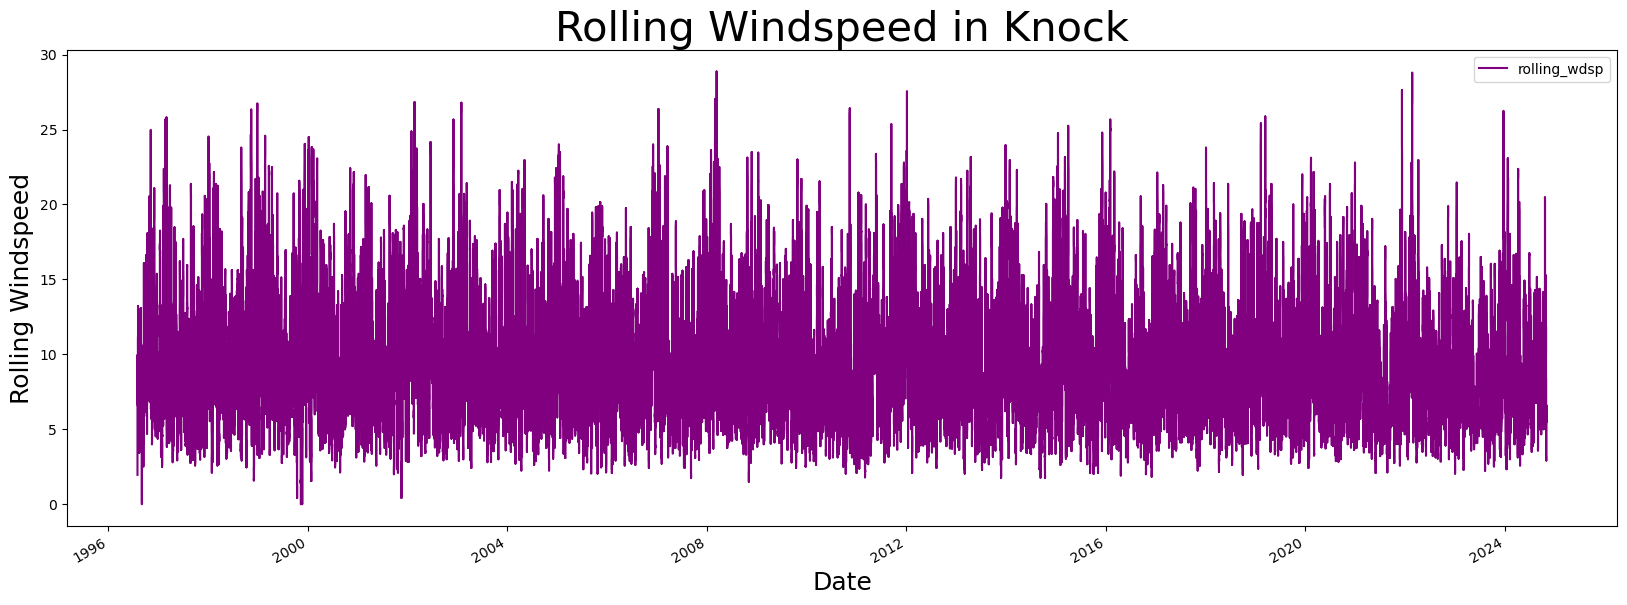

In [22]:
# Create a plot with the rolling windspeed over 24 hours.
# First I'll create a new column with the rolling windspeed over 24 hours.

df['rolling_wdsp'] = df['wdsp'].rolling(window=24).mean()
df.loc[:, ['date', 'rolling_wdsp']]

# Plot the rolling windspeed and date.
df[['date', 'rolling_wdsp']].plot(x='date', y='rolling_wdsp', kind='line', color="purple", figsize=(20, 7))

plt.title("Rolling Windspeed in Knock", fontsize=30, color='black')
plt.xlabel("Date", fontsize=18, color='black')
plt.ylabel("Rolling Windspeed", fontsize=18, color='black')
plt.show()

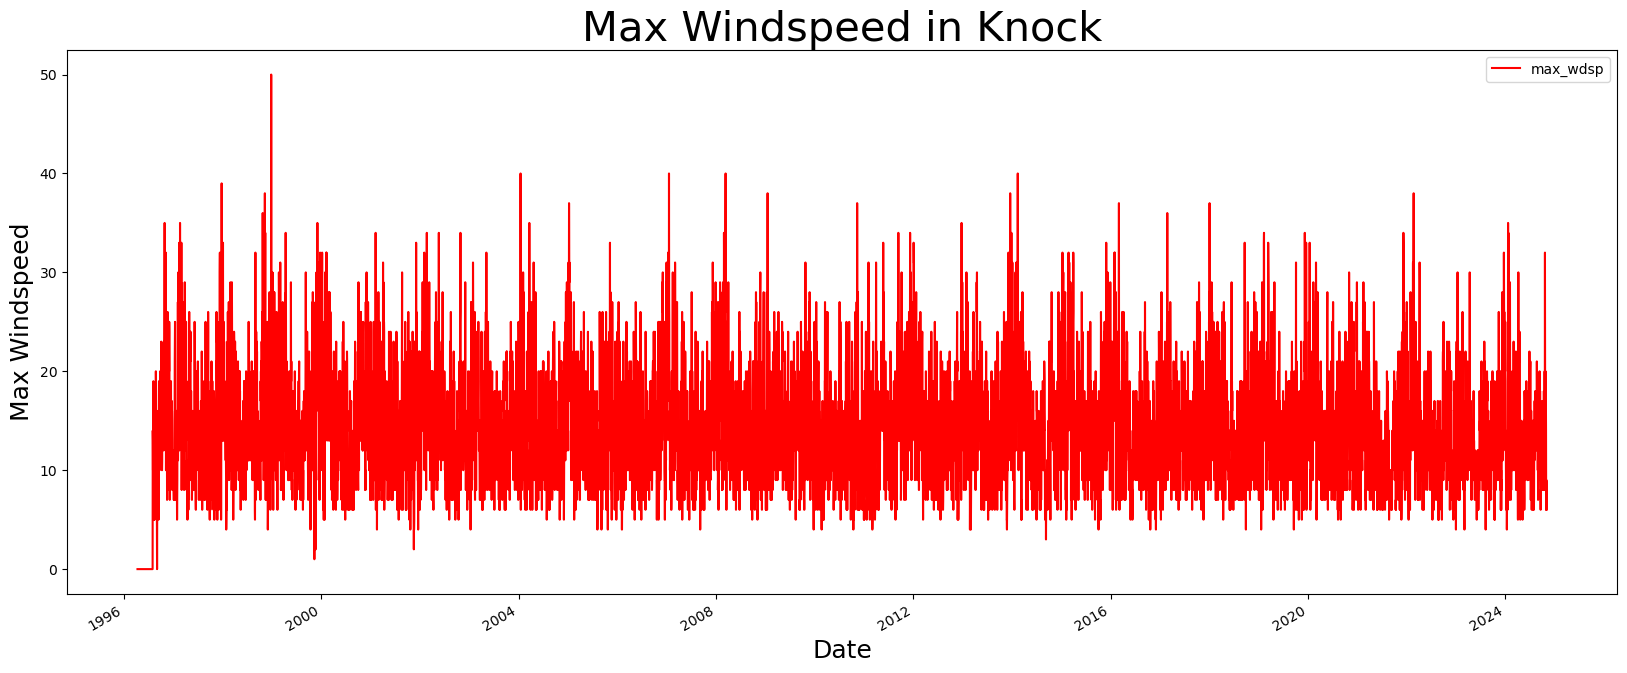

In [23]:
# Create a plot with the max windspeed for each day. 
# First I'll create a new column with the max windspeed for each day.

df['max_wdsp'] = df.groupby('date')['wdsp'].transform('max')

# Plot the max windspeed for each day.
df[['date', 'max_wdsp']].plot(x='date', y='max_wdsp', kind='line', color="red", figsize=(20, 8))

plt.title("Max Windspeed in Knock", fontsize=30, color='black')
plt.xlabel("Date", fontsize=18, color='black')
plt.ylabel("Max Windspeed", fontsize=18, color='black')
plt.show()


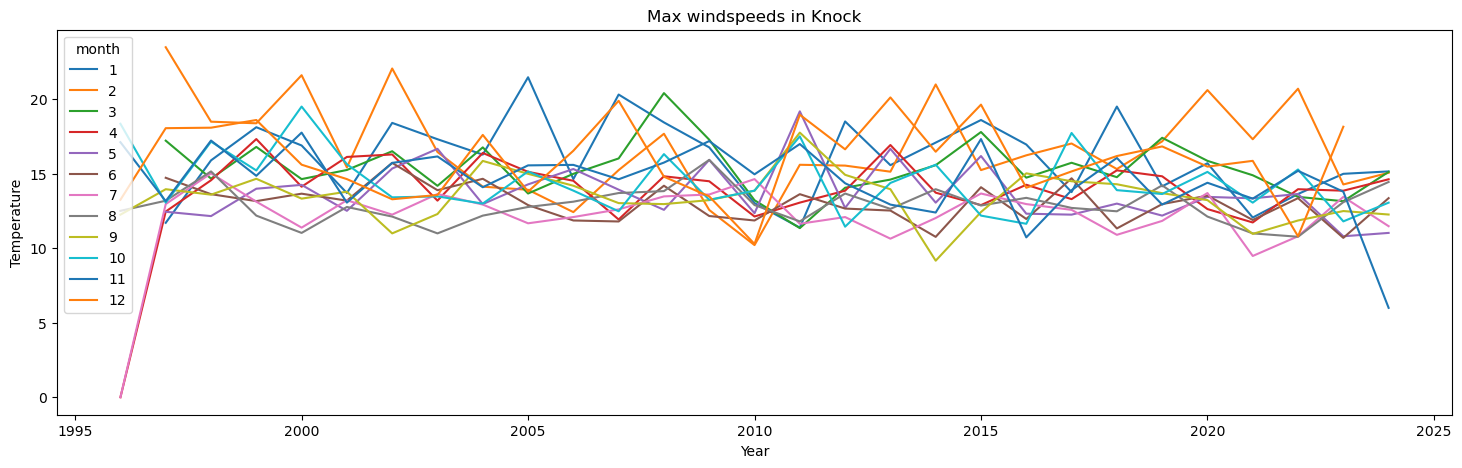

In [24]:
# create subplots with the max windspeeds per each month in each year.

fig, ax = plt.subplots(figsize=(18, 5))
df.groupby(['year', 'month'])['max_wdsp'].mean().unstack().plot(ax=ax)
ax.set(title="Max windspeeds in Knock", xlabel="Year", ylabel="Temperature")
plt.show()

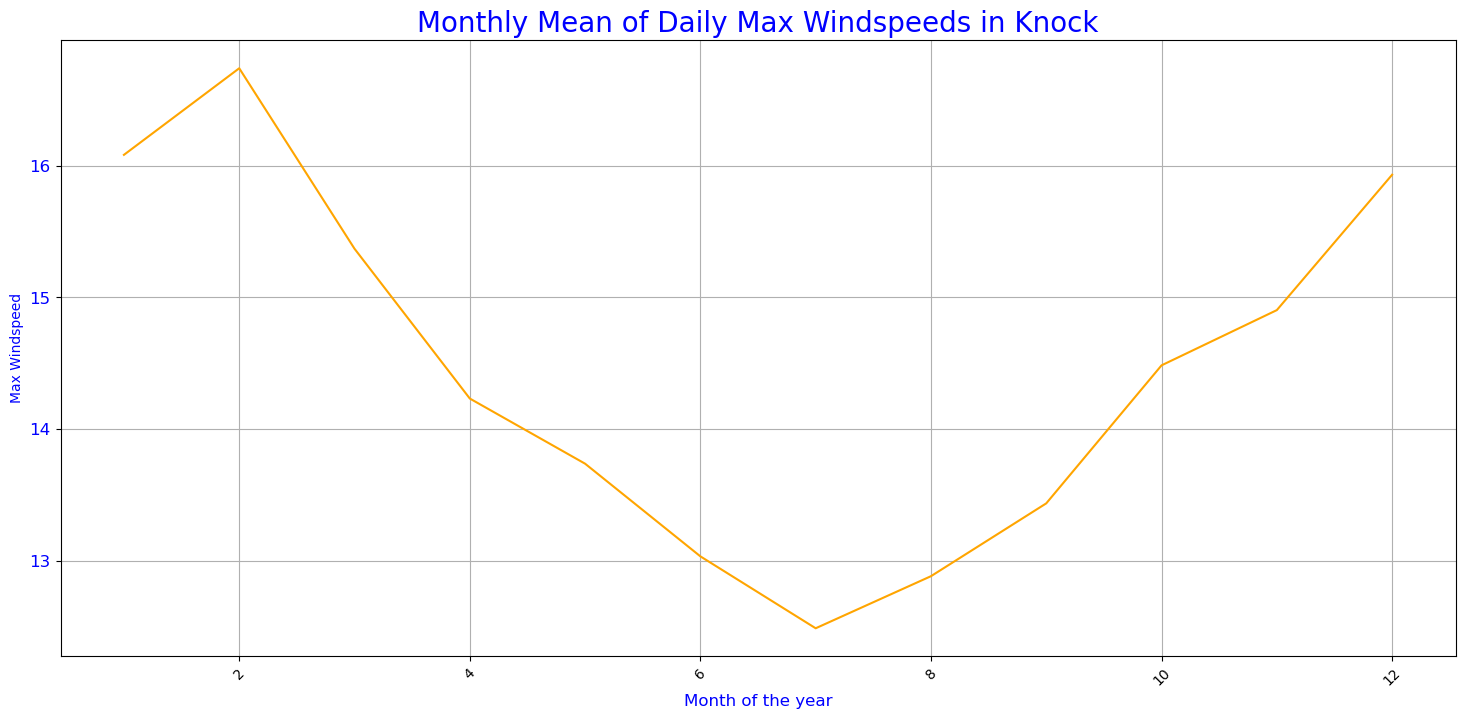

In [25]:
# Create a plot with the monthly mean of the daily max windspeeds.
# First I'll create a new column with the monthly mean of the daily max windspeeds.

df['monthly_max_wdsp'] = df.groupby('monthly')['max_wdsp'].transform('mean')

# Plot the monthly mean of the daily max windspeeds.
monthly_max_wdsp = df.groupby('monthly')['max_wdsp'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(monthly_max_wdsp.index, monthly_max_wdsp.values, color='orange')
ax.set(xlabel="Month", ylabel="Max Windspeed", title="Monthly Mean of Daily Max Windspeeds in Knock")
ax.title.set_color('blue')
ax.title.set_fontsize(20)
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
plt.xlabel("Month of the year", fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.yticks(fontsize=12, color='blue')
ax.grid()
plt.show()


**************************************************************

End